<a href="https://colab.research.google.com/github/santhoshmohan8/MachineLearning/blob/main/Logistic_Spam_Mail_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Objective :

Build a classification model using logistic regression algorithm. Initially a baseline model is build, and Basic logistic regression model is built and a hyperparameter tuned logistic model is build.
Different evaluation metrics like confusion matrix, accuracy, precision are chosen to evaluate the performance of the model.
AUC-ROC and AUC-PR plots are compared to see any significant performance insight across plots.

Spam mail prediction dataset is choosen for this exercise.

In [28]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [31]:
# Data import
def data():
    spam_data = pd.read_csv("mail_data.csv")
    return spam_data

# exploratory analysis
def eda(spam_data):
    spam_data.isna().sum()
    spam_data.info()
    spam_data.describe()
    spam_data = spam_data.where((pd.notnull(spam_data)),'') # replace NaN values if any
    print("Event rate for target : \n",spam_data.Category.value_counts()/spam_data.shape[0]*100)
    return spam_data

# Preprocessing
def preprocessing(spam_data):
    encoder = LabelEncoder()
    target_encoded = encoder.fit_transform(spam_data['Category'])
    spam_data = pd.concat([spam_data,pd.Series(target_encoded)], axis=1).drop(columns=['Category']).rename(columns={0:'Category'})
    target_decoded = encoder.inverse_transform(target_encoded)
    print(pd.DataFrame(np.vstack((target_decoded,target_encoded)).T).groupby([0,1]).nunique())
    return spam_data

def data_transform(x_train, x_test):
    vector = TfidfVectorizer(stop_words='english',min_df = 1,lowercase = True)
    x_train_feature = vector.fit_transform(x_train)
    x_test_feature = vector.transform(x_test)
    return x_train_feature, x_test_feature, vector

def baseline_model(x_train_feature,y_train, x_test_feature,y_test):
    model = DummyClassifier(strategy='uniform').fit(x_train_feature,y_train)
    y_train_predict = model.predict(x_train_feature)
    y_test_predict = model.predict(x_test_feature)
    model_performance(y_test,y_test_predict)

def model_performance(y_test,y_test_predict):
    cm = metrics.confusion_matrix(y_test,y_test_predict)
    precision, recall, _ = metrics.precision_recall_curve(y_test,y_test_predict)
    print("\n\nConfusion matrix :\n",cm)
    print("\n\nClassification report :\n",metrics.classification_report(y_test,y_test_predict))
    print("\nAccuracy score :",metrics.accuracy_score(y_test,y_test_predict))
    print("\nAUC-ROC Value :",metrics.roc_auc_score(y_test,y_test_predict))
    print("\nAUC-PR Value",metrics.auc(recall, precision))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Event rate for target : 
 ham     86.593683
spam    13.406317
Name: Category, dtype: float64
Empty DataFrame
Columns: []
Index: [(ham, 0), (spam, 1)]


Confusion matrix :
 [[490 470]
 [ 65  90]]


Classification report :
               precision    recall  f1-score   support

           0       0.88      0.51      0.65       960
           1       0.16      0.58      0.25       155

    accuracy                           0.52      1115
   macro avg       0.52      0.55      0.45      1115
weighted avg       0.78      0.52      0.59      1115


Accuracy score : 0.5201793721973094

AUC-ROC Value : 0.5455309139784947

AUC-PR Value 0.39982770556508446


Confusion matrix :
 [[960   0]
 [ 38 117]]


/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(




Confusion matrix :
 [[959   1]
 [ 19 136]]


Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       0.99      0.88      0.93       155

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Accuracy score : 0.9820627802690582

AUC-ROC Value : 0.9381888440860215

AUC-PR Value 0.9435802217550558


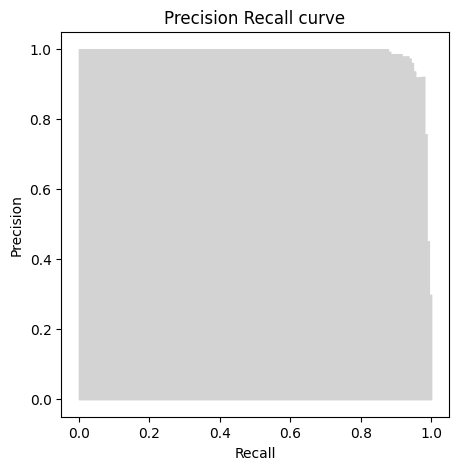

0.9865650637154282


In [32]:
if __name__ == '__main__':
    spam_data = data()
    spam_data = eda(spam_data)
    spam_data = preprocessing(spam_data)
    
    x = spam_data['Message']
    y = spam_data['Category']
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)
    #y_train = y_train.astype('int')
    #y_test = y_test.astype('int')

    x_train_feature, x_test_feature, vector = data_transform(x_train, x_test)
    baseline_model(x_train_feature,y_train, x_test_feature,y_test)

    model_list = [
    LogisticRegression(),
    LogisticRegression(C=1, solver='newton-cg', penalty='l2', max_iter=100),
    LogisticRegression(C=1, solver='lbfgs', penalty='l2', max_iter=100),
    LogisticRegression(C=1, solver='sag', penalty='l2', max_iter=100),
    LogisticRegression(C=1, solver='saga', penalty='l2', max_iter=100)
    ]

    for model in model_list:
        model.fit(x_train_feature,y_train)
        y_train_predict = model.predict(x_train_feature)
        y_test_predict = model.predict(x_test_feature)
        model_performance(y_test,y_test_predict)

    model = LogisticRegression()
    model_cv = {'C':[0.1,1,10],
            'solver':['newton-cg','lbfgs','sag','saga'],
            'penalty':['l2'],
            'max_iter':[100]}

    model_GSCV = GridSearchCV(estimator=model,param_grid = model_cv,cv=3).fit(x_train_feature,y_train)

    model = LogisticRegression(**model_GSCV.best_params_).fit(x_train_feature,y_train)
    y_train_predict = model.predict(x_train_feature)
    y_test_predict = model.predict(x_test_feature)
    y_test_pre_prob = model.predict_proba(x_test_feature)[:,1]
    model_performance(y_test,y_test_predict)

    plt.figure(figsize=(5,5))
    precision, recall, _ = metrics.precision_recall_curve(y_test,y_test_pre_prob)
    plt.fill_between(recall, precision, color = 'lightgrey')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall curve')
    plt.show()

    print(metrics.auc(recall, precision))

    pickle.dump(model,open('model.pkl','wb'))
    pickle.dump(vector,open('vector.pkl','wb'))